In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
DATA_DIR = os.path.realpath('data/files/')

### MetaData Analysis

In [11]:
meta_df = pd.read_csv('data/metadata_participants.txt', sep='\t')
meta_df

,PARTICIPANT_ID,AGE,GENDER,HAS_TAKEN_TYPING_COURSE,COUNTRY,LAYOUT,NATIVE_LANGUAGE,FINGERS,TIME_SPENT_TYPING,KEYBOARD_TYPE,ERROR_RATE,AVG_WPM_15,AVG_IKI,ECPC,KSPC,ROR
0,3,30,none,0,US,qwerty,en,1-2,8,full,0.511945,61.9483,169.224722,0.052901,1.151877,0.2288
1,5,27,female,0,MY,qwerty,en,7-8,6,laptop,0.871080,72.8871,150.457375,0.031469,1.101399,0.3675
2,7,13,female,0,AU,qwerty,en,7-8,0,laptop,6.685633,24.1809,386.575303,0.092105,1.292398,0.0667
3,23,21,female,0,IN,qwerty,en,3-4,0,full,2.130493,24.7112,457.947902,0.016624,1.072890,0.0413
4,24,21,female,0,PH,qwerty,tl,7-8,1,laptop,1.893287,45.3364,223.913395,0.045296,1.177700,0.2678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168589,517932,20,male,0,US,qwerty,en,9-10,2,laptop,8.731466,24.9125,392.646012,0.116638,1.245283,0.1842
168590,517936,25,male,0,PL,qwerty,pl,9-10,1,laptop,0.000000,66.2946,166.587565,0.023932,1.095726,0.0639
168591,517943,38,female,1,US,qwerty,en,9-10,3,laptop,0.147929,75.6713,138.880622,0.057607,1.140325,0.2021
168592,517944,28,female,0,GB,qwerty,en,9-10,6,laptop,0.278552,91.7083,111.372849,0.050139,1.171309,0.5133


### Filtering Layout

azerty percentage in dataset: 0.64 %
dvorak percentage in dataset: 0.12 %
qwerty percentage in dataset: 98.06 %
qwertz percentage in dataset: 1.17 %


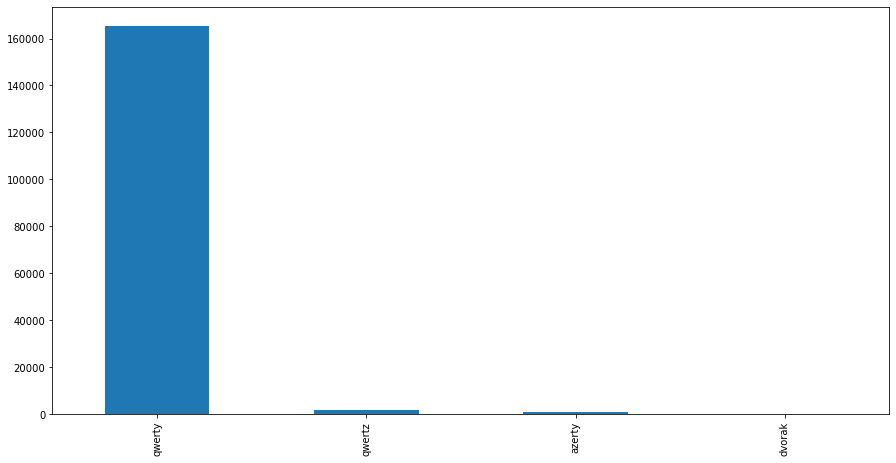

In [28]:
meta_df['LAYOUT'].value_counts().plot(kind='bar', figsize=(15, 7.5))
for l in sorted(meta_df['LAYOUT'].unique()):
    print(f"{l} percentage in dataset: {meta_df['LAYOUT'].value_counts()[l]/meta_df.shape[0] * 100 :.2f} %")

In [29]:
meta_df = meta_df[meta_df['LAYOUT'] =='qwerty']

### Filtering Keyboard Type

full percentage in dataset: 43.74 %
laptop percentage in dataset: 54.28 %
on-screen percentage in dataset: 0.90 %
small percentage in dataset: 1.07 %


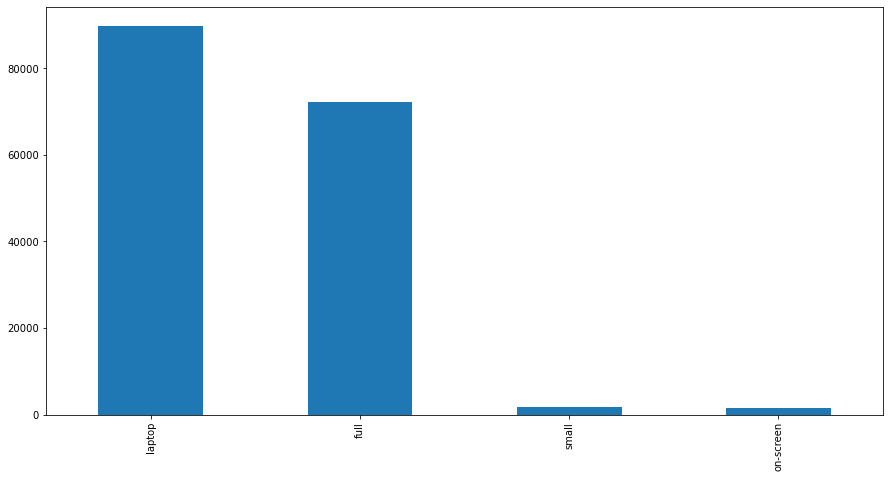

In [31]:
meta_df['KEYBOARD_TYPE'].value_counts().plot(kind='bar', figsize=(15, 7.5))
for l in sorted(meta_df['KEYBOARD_TYPE'].unique()):
    print(f"{l} percentage in dataset: {meta_df['KEYBOARD_TYPE'].value_counts()[l]/meta_df.shape[0] * 100 :.2f} %")

In [32]:
meta_df = meta_df[meta_df['KEYBOARD_TYPE'].isin(['full', 'laptop'])]
meta_df

,PARTICIPANT_ID,AGE,GENDER,HAS_TAKEN_TYPING_COURSE,COUNTRY,LAYOUT,NATIVE_LANGUAGE,FINGERS,TIME_SPENT_TYPING,KEYBOARD_TYPE,ERROR_RATE,AVG_WPM_15,AVG_IKI,ECPC,KSPC,ROR
0,3,30,none,0,US,qwerty,en,1-2,8,full,0.511945,61.9483,169.224722,0.052901,1.151877,0.2288
1,5,27,female,0,MY,qwerty,en,7-8,6,laptop,0.871080,72.8871,150.457375,0.031469,1.101399,0.3675
2,7,13,female,0,AU,qwerty,en,7-8,0,laptop,6.685633,24.1809,386.575303,0.092105,1.292398,0.0667
3,23,21,female,0,IN,qwerty,en,3-4,0,full,2.130493,24.7112,457.947902,0.016624,1.072890,0.0413
4,24,21,female,0,PH,qwerty,tl,7-8,1,laptop,1.893287,45.3364,223.913395,0.045296,1.177700,0.2678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168589,517932,20,male,0,US,qwerty,en,9-10,2,laptop,8.731466,24.9125,392.646012,0.116638,1.245283,0.1842
168590,517936,25,male,0,PL,qwerty,pl,9-10,1,laptop,0.000000,66.2946,166.587565,0.023932,1.095726,0.0639
168591,517943,38,female,1,US,qwerty,en,9-10,3,laptop,0.147929,75.6713,138.880622,0.057607,1.140325,0.2021
168592,517944,28,female,0,GB,qwerty,en,9-10,6,laptop,0.278552,91.7083,111.372849,0.050139,1.171309,0.5133


### Lets look for the distribution

In [36]:
meta_df.isna().sum()

PARTICIPANT_ID              0
AGE                         0
GENDER                      0
HAS_TAKEN_TYPING_COURSE     0
COUNTRY                    13
LAYOUT                      0
NATIVE_LANGUAGE             0
FINGERS                     0
TIME_SPENT_TYPING           0
KEYBOARD_TYPE               0
ERROR_RATE                  0
AVG_WPM_15                  0
AVG_IKI                     0
ECPC                        0
KSPC                        0
ROR                         0
dtype: int64

In [34]:
cat_features = ['GENDER', 'NATIVE_LANGUAGE', 'FINGERS']
num_features = ['AGE', 'TIME_SPENT_TYPING', 'ERROR_RATE', 'AVG_WPM_15', 'AVG_IKI', 'ECPC', 'KSPC', 'ROR']

array([[<AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='TIME_SPENT_TYPING', ylabel='AGE'>,
        <AxesSubplot:xlabel='ERROR_RATE', ylabel='AGE'>,
        <AxesSubplot:xlabel='AVG_WPM_15', ylabel='AGE'>,
        <AxesSubplot:xlabel='AVG_IKI', ylabel='AGE'>,
        <AxesSubplot:xlabel='ECPC', ylabel='AGE'>,
        <AxesSubplot:xlabel='KSPC', ylabel='AGE'>,
        <AxesSubplot:xlabel='ROR', ylabel='AGE'>],
       [<AxesSubplot:xlabel='AGE', ylabel='TIME_SPENT_TYPING'>,
        <AxesSubplot:xlabel='TIME_SPENT_TYPING', ylabel='TIME_SPENT_TYPING'>,
        <AxesSubplot:xlabel='ERROR_RATE', ylabel='TIME_SPENT_TYPING'>,
        <AxesSubplot:xlabel='AVG_WPM_15', ylabel='TIME_SPENT_TYPING'>,
        <AxesSubplot:xlabel='AVG_IKI', ylabel='TIME_SPENT_TYPING'>,
        <AxesSubplot:xlabel='ECPC', ylabel='TIME_SPENT_TYPING'>,
        <AxesSubplot:xlabel='KSPC', ylabel='TIME_SPENT_TYPING'>,
        <AxesSubplot:xlabel='ROR', ylabel='TIME_SPENT_TYPING'>],
       [<AxesSubpl

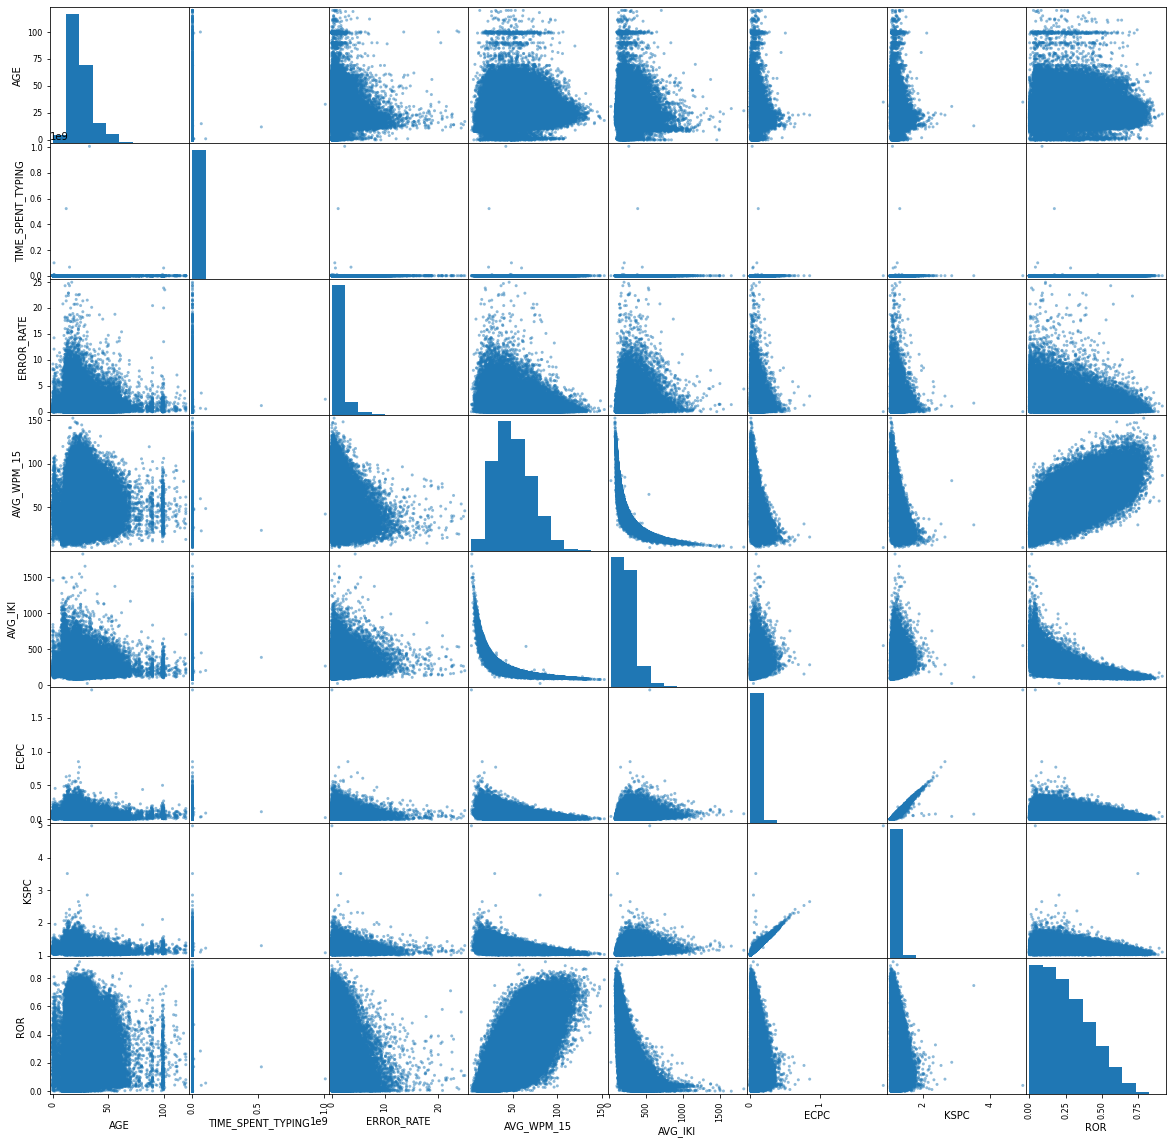

In [40]:
pd.plotting.scatter_matrix(meta_df[num_features], figsize=(20,20))